In [196]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import sklearn

In [197]:
dataset_red=pd.read_csv("Data/红酒白酒分类+回归（都可以）/winequality-red.csv",sep=";",index_col=False)
dataset_white=pd.read_csv("Data/红酒白酒分类+回归（都可以）/winequality-white.csv",sep=";",index_col=False)


In [198]:
dataset=pd.concat([dataset_red,dataset_white],axis=0)
# dataset.set_index("chlorides")

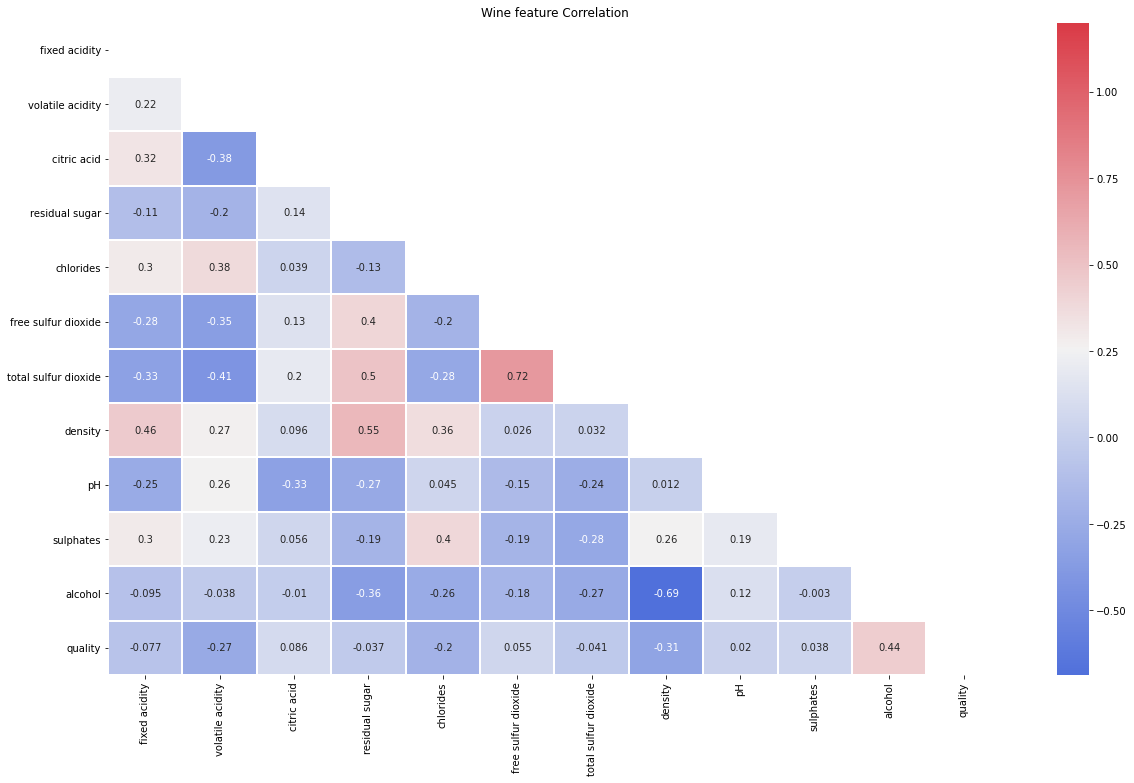

In [199]:
import numpy as np
corrMatt = dataset.corr()
# print(corrMatt)  相关矩阵

mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Wine feature Correlation')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [200]:
label = train.columns

In [201]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(dataset,test_size=0.2,random_state=1)

In [202]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm = norm.fit(train)
n_train = norm.transform(train)
n_test = norm.transform(test)

In [203]:
new_train = pd.DataFrame(n_train, None, label, None)
new_test = pd.DataFrame(n_test, None, label, None)

In [204]:
y_test = new_test["chlorides"]
x_test = new_test.drop("chlorides", axis = 1)
y_train = new_train["chlorides"]
x_train = new_train.drop("chlorides", axis = 1)

In [209]:
# y_train.to_numpy()
# x_train.to_numpy()

array([[0.03944298, 0.0008139 , 0.00262953, ..., 0.00450777, 0.07012085,
        0.04382553],
       [0.17409569, 0.01435113, 0.00023526, ..., 0.01529219, 0.23055916,
        0.11763223],
       [0.04113832, 0.0017998 , 0.00173552, ..., 0.00295682, 0.0559224 ,
        0.03213931],
       ...,
       [0.04683991, 0.00153903, 0.00281039, ..., 0.00394794, 0.06825244,
        0.04014849],
       [0.16851418, 0.01474499, 0.        , ..., 0.01357475, 0.21064272,
        0.14042848],
       [0.04807169, 0.0018554 , 0.0018554 , ..., 0.00404814, 0.07590266,
        0.05060177]])

In [ ]:
new_train = dataset

In [213]:
# #Feature selection
# from sklearn.feature_selection import SelectKBest, chi2
# selector = SelectKBest(chi2,k=8)
# Xnf_train = selector.fit_transform(x_train)
# # Xnf_test = selector.transform(Xn_test)

TypeError: fit() missing 1 required positional argument: 'y'

In [218]:
from sklearn.svm import SVR

clf=SVR(C=1.0,kernel="rbf",degree=3,gamma='auto')
clf.fit(X_train,y_train)

SVR(gamma='auto')

In [220]:
regressor_score=clf.score(X_test,y_test)
print('The regression accuracy score is {:03.2f}'.format(regressor_score))


The regression accuracy score is -64.52


In [46]:
# from sklearn.model_selection import cross_val_score
# y_predict=clf.predict(Xnf_test)
# cross_val_score(clf, X, y, cv=5, scoring='recall_macro')